# Exploratory data analysis on Facebook Pages dataset

In [1]:

!kaggle datasets download -p ./data2 -d ishandutta/facebook-large-pagepage-network-data-set --unzip 

Dataset URL: https://www.kaggle.com/datasets/ishandutta/facebook-large-pagepage-network-data-set
License(s): ODbL-1.0
 59%|██████████████████████▍               | 1.00M/1.70M [00:00<00:00, 2.05MB/s]
100%|██████████████████████████████████████| 1.70M/1.70M [00:00<00:00, 2.99MB/s]


## Prepare data for import

In [8]:
import pandas as pd

pages = pd.read_csv("data/facebook_large/musae_facebook_target.csv")
edges = pd.read_csv("data/facebook_large/musae_facebook_edges.csv")

### Structure of data
We have 22.470 vertex with 4 columns.  
Every columns doesn't have missing data.

In [9]:
print("VERTEX DATA")
print(f"shape: {pages.shape[0]} rows, {pages.shape[1]} columns")
print(f"columns: {list(pages.columns)}\n")
print(pages.info())

VERTEX DATA
shape: 22470 rows, 4 columns
columns: ['id', 'facebook_id', 'page_name', 'page_type']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22470 entries, 0 to 22469
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           22470 non-null  int64 
 1   facebook_id  22470 non-null  int64 
 2   page_name    22470 non-null  object
 3   page_type    22470 non-null  object
dtypes: int64(2), object(2)
memory usage: 702.3+ KB
None


We have 171.002 undericted edges and without labels.  
Every columns doesn't have missing data.

In [10]:
print("EDGE DATA")
print(f"shape: {edges.shape[0]} rows, {edges.shape[1]} columns")
print(f"columns: {list(edges.columns)}\n")
print(edges.info())

EDGE DATA
shape: 171002 rows, 2 columns
columns: ['id_1', 'id_2']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171002 entries, 0 to 171001
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   id_1    171002 non-null  int64
 1   id_2    171002 non-null  int64
dtypes: int64(2)
memory usage: 2.6 MB
None


### Normalized data?

Data structure is not normalized, pages have page_type attribute that is
we have two ids for the edge.  
facebook_id is not useful so we will delete it.  
An interest thing is that we have multiple page with the same page_name.  
The duplicate pages are only 356 so we ignore it.  
#TODO: check if this is a problem

Pages
Unique ids? True
Unique id_facebook? True
How many page_type? 4
Unique page_name? False
How many duplicate page_name? 356


<Axes: >

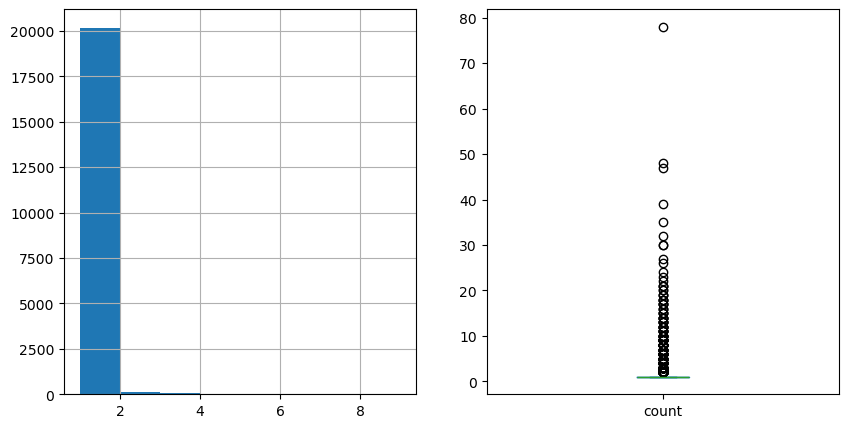

In [11]:
## Verify if we have unique ids
print("Pages")
print(f"Unique ids? {pages['id'].nunique() == pages.shape[0]}")
print(f"Unique id_facebook? {pages['facebook_id'].nunique() == pages.shape[0]}")
print(f"How many page_type? {pages['page_type'].nunique()}")
print(f"Unique page_name? {pages['page_name'].nunique() == pages.shape[0]}")
duplicate_pages = pages["page_name"].value_counts()
print(f"How many duplicate page_name? {duplicate_pages[duplicate_pages > 1].shape[0]}")

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
duplicate_pages.hist(bins=range(1, 10), ax=axs[0])
duplicate_pages.plot(kind="box", ax=axs[1])

In [15]:
## Verify if there are any nodes that have no edges
print(f"Are source edge correct? {edges['id_1'].isin(pages['id']).all()}")
print(f"Are target edge correct? {edges['id_2'].isin(pages['id']).all()}")
connected_nodes = pd.concat([edges["id_1"], edges["id_2"]]).unique()
print(f"Are there any nodes without edge ? {pages['id'].isin(connected_nodes).all()}")
print(
    f"Are there any edge with same source and target? {edges['id_1'].isin(edges['id_2']).any()}"
)
print(
    f"How many edge with same source and target? {edges[edges['id_1'] == edges['id_2']].shape[0]}"
)
##TODO: Check if it is possible to have edge with same source and target

Are source edge correct? True
Are target edge correct? True
Are there any nodes without edge ? True
Are there any edge with same source and target? True
How many edge with same source and target? 179


## We're ready to import data on Neo4j